<a href="https://colab.research.google.com/github/yohanesnuwara/open-geoscience-repository/blob/master/dutch-f3/sobel_implementation_seismic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sobel Derivative Implementation in Seismic Interpretation

> Yohanes Nuwara (My own implementation of *Computer Vision Basics* course, The State University of New York at Buffalo, finished 16 May 2020)

Import libraries: basic visualization library `matplotlib` and image processing `cv2`

In [0]:
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

Download a seismic section image (in `JPG`) of Dutch F3 at Crossline 1000

In [24]:
!wget https://github.com/yohanesnuwara/nuwara-online-courses/blob/master/computer-vision/dutch_f3_xline100.jpg

--2020-05-16 05:32:34--  https://github.com/yohanesnuwara/nuwara-online-courses/blob/master/computer-vision/dutch_f3_xline100.jpg
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘dutch_f3_xline100.jpg.1’

dutch_f3_xline100.j     [  <=>               ]  65.89K   186KB/s    in 0.4s    

2020-05-16 05:32:36 (186 KB/s) - ‘dutch_f3_xline100.jpg.1’ saved [67474]



Retrieve the file path and read the image with `cv2.imread`. 

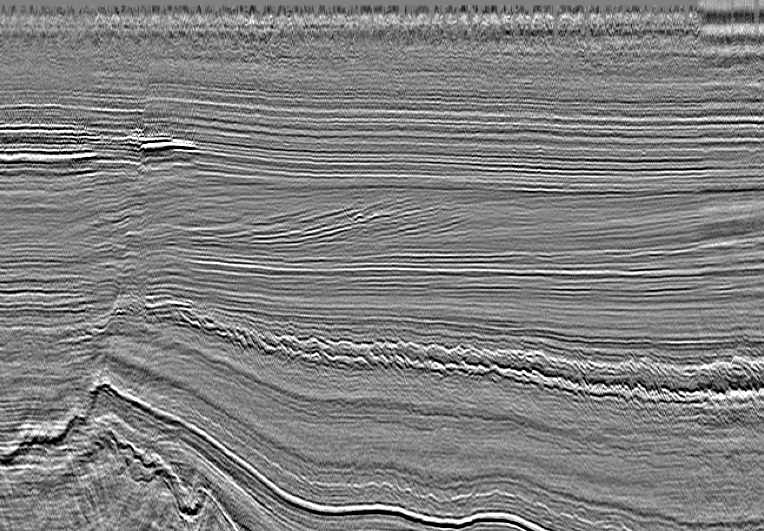

In [16]:
path = '/content/dutch_f3_xline100.jpg'

dutchf3 = cv2.imread(path)
cv2_imshow(dutchf3)

Perform gaussian blurring to reduce the noise in the image using `cv2.GaussianBlur`

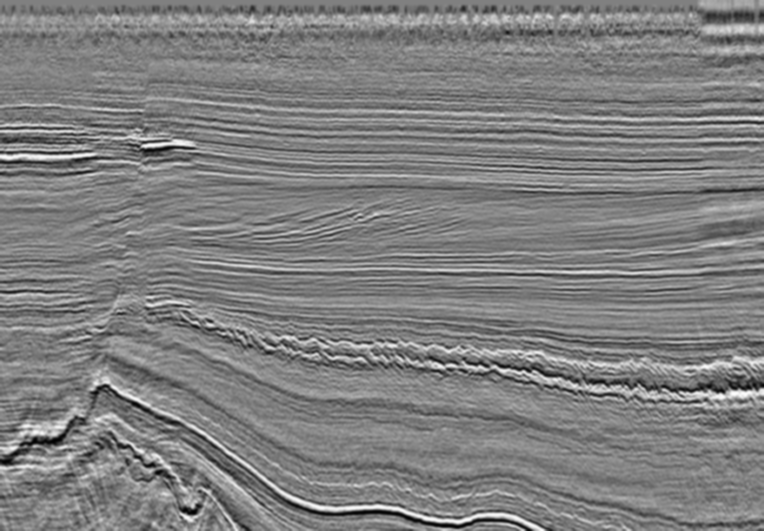

In [20]:
dutchf3 = cv2.GaussianBlur(dutchf3,(3,3),0)
cv2_imshow(dutchf3)

Finally, compute its x and y-direction Sobel derivatives and display the results

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


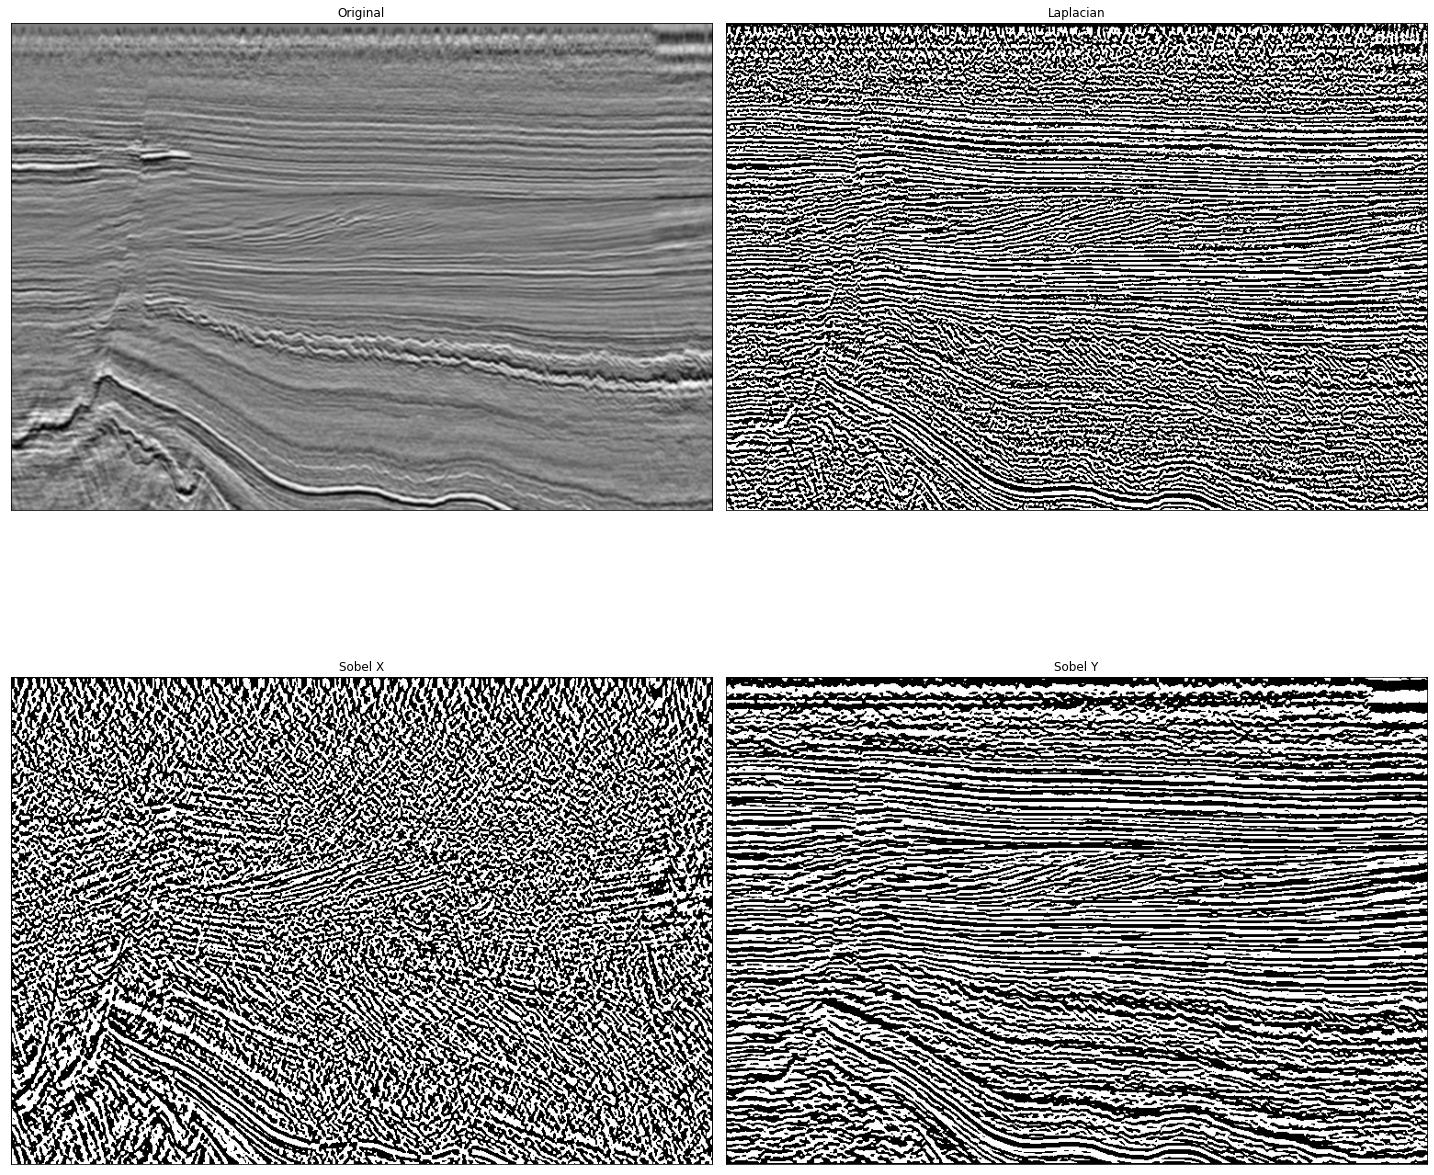

In [23]:
# calculation laplacian, sobel horizontal, and sobel vertical 

laplacian = cv2.Laplacian(dutchf3,cv2.CV_64F)
Gx = cv2.Sobel(dutchf3,cv2.CV_64F,1,0,ksize=3)
Gy = cv2.Sobel(dutchf3,cv2.CV_64F,0,1,ksize=3)

plt.figure(figsize=(20,20))

plt.subplot(2,2,1),plt.imshow(dutchf3)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian)
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(Gx)
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(Gy)
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.tight_layout(pad=1.0)
plt.show()

# Summary

The Sobel x-direction derivative of Dutch F3 seismic image somehow showed faults clearly. The Sobel y-derivative showed clearly the depositional (stratigraphic) layers, and pretty looks much similar to a cosine of phase attribute.  